# Análise de sentimento de reviews do Aplicativo do spotify

-------------------------------
## Objetivo

Esse projeto tem como objetivo entender as principais críticas dos usuários do aplicativo de streaming música Spotify baseado em `reviews` publicadas pelos mesmos na Google Play Store. Para isso faremos uma análise de linguagem natural das avaliações disponíveis na base de dados, primeiro analisando o sentimento delas e classificando em positiva, neutra ou negativa, como estamos mais interessados nesta última classe vamos juntar os textos delas e fazer uma sumarização deles.

## Dados

Os dados estão presentes no Kaggle e estão estruturados conforme se segue abaixo:

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/antunesvitor/pln-spotify-reviews/master/reviews.csv")
data.head() 

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


Na tabela acima podemos ver as colunas (atributos) dos registros, no caso temos o `Time_Submitted`, `Review`, `Rating`, `Total_thumbsup` e `Reply` que são respectivamente a data e hora que submeteram a avaliação, o texto, a nota que deram que vai de 1 a 5, o tanto que a avaliação recebeu de feedback positivo, e Reply seria as respostas que a review recebeu.

## Metodologia

Cada registro nos dados acima contém dois itens importantes para cumprirmos o objetivo, o texto a ser analisado e a nota dada. Sabendo que faremos uma análise de sentimento da avaliação divididas nas categorias de positiva, neutro e negativa, é esperado que reviews positivas possuem um `Rating` mais alto (4 ou 5) enquanto as negativas mais baixas (1 ou 2).

## Execução

Vamos começar com a análise de sentimento. Vamos pegar os dados na variável `data` e vamos criar um novo DataFrame com apenas os dados que nos interessam. No caso a biblioteca que usamos vai atribuir um valor numérico ao sentimento da frase, retornando um valor de -1 a 1 chamada de polaridade, quanto mais próximo de -1 mais negativo, e quanto mais próximo de 1 mais positivo. Após fazer a análise vamos criar uma nova coluna categorizando o sentimento da review, se a polaridade for menor ou igual a -0.33 será negativa, se estiver entre -0.33 e +0.33 será neutra e positiva se for mais que 0.33. Dessa forma teremos intervalos iguais para cada categoria.

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
from time import sleep
from textblob import TextBlob
from tqdm.notebook import tqdm
import nltk
import pandas as pd

reviews = pd.DataFrame(columns=["index", "Review", "Rating", "sentimento_pontuacao"])

for row_index, registro in tqdm(iterable=data.iterrows(),total=data.shape[0]):
    
    indice = row_index
    review_txt = registro["Review"]     # texto da avaliação
    nota = registro["Rating"]           # de 1 a 5

    blob = TextBlob(review_txt)
    sentimento = blob.sentiment.polarity
    review = pd.DataFrame([[indice, review_txt, nota, sentimento]], columns=["index", "Review", "Rating", "sentimento_pontuacao"])
    reviews = pd.concat([reviews, review])

  0%|          | 0/61594 [00:00<?, ?it/s]

In [4]:
#após feita a análise para cada review vamos categorizar elas
def categorizar_sentimento(polaridade):
  if polaridade <= -0.33:
    return "negativa"
  elif polaridade > -0.33 and polaridade < 0.33:
    return "neutra"
  else:
    return "positiva"

reviews["sentimento_texto"] = reviews.apply(lambda row: categorizar_sentimento(row["sentimento_pontuacao"]), axis=1)

reviews.head()

,index,Review,Rating,sentimento_pontuacao,sentimento_texto
0,0,"Great music service, the audio is high quality...",5,0.440333,positiva
0,1,Please ignore previous negative rating. This a...,5,0.166667,neutra
0,2,"This pop-up ""Get the best Spotify experience o...",4,0.100000,neutra
0,3,Really buggy and terrible to use as of recently,1,-0.266667,neutra
0,4,Dear Spotify why do I get songs that I didn't ...,1,0.000000,neutra


In [5]:
from google.colab import output
output.disable_custom_widget_manager()


Contagem de textos por sentimento


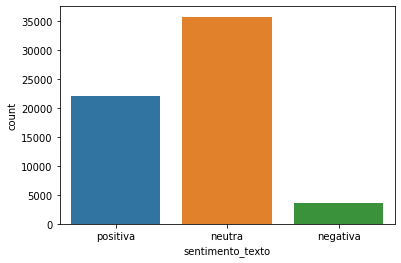

In [6]:

import seaborn as sns

sns.countplot(x="sentimento_texto", data = reviews );

Contagem de textos por review


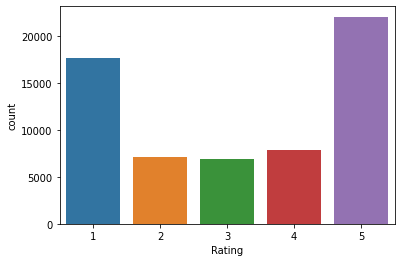

In [7]:
# contagem de textos em cada classe
sns.countplot(x="Rating",data = reviews);

# Visualizacao dos dados utilizando Nuvem de palavras


Vamos criar primeiro uma nuvem de palavras com todas as reviews, utilizando WordCloud

In [8]:
%matplotlib inline

from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in data["Review"]])

In [9]:
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

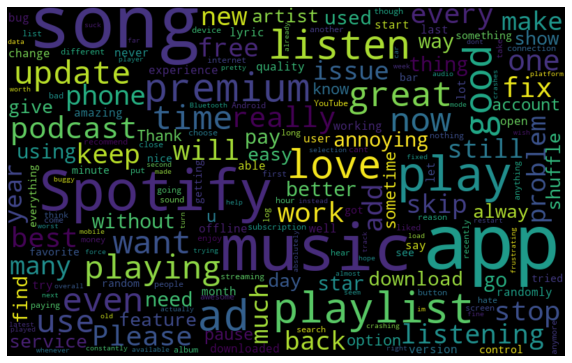

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Vamos criar uma nuvem de palavras com as reviews positivas

In [11]:
reviews_positivas = reviews.query("sentimento_texto == 'positiva'")

In [12]:
reviews_positivas.head()

,index,Review,Rating,sentimento_pontuacao,sentimento_texto
0,0,"Great music service, the audio is high quality...",5,0.440333,positiva
0,6,I love the selection and the lyrics are provid...,5,0.625000,positiva
0,8,It's a great app and the best mp3 music app I ...,5,0.950000,positiva
0,15,Improve the IA to recommend songs and to find ...,5,0.541667,positiva
0,20,This will always be my favorite platform to li...,5,0.500000,positiva


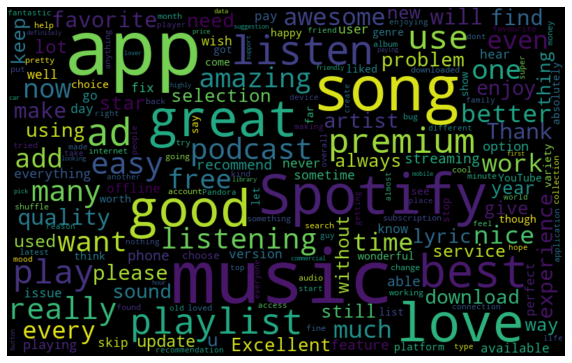

In [13]:
palavras_positivas = ' '.join([texto for texto in reviews_positivas["Review"]])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(palavras_positivas)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Nuvem de palavras com reviews neutras

In [14]:
reviews_neutras = reviews.query("sentimento_texto == 'neutra'")

In [15]:
reviews_neutras.head()

,index,Review,Rating,sentimento_pontuacao,sentimento_texto
0,1,Please ignore previous negative rating. This a...,5,0.166667,neutra
0,2,"This pop-up ""Get the best Spotify experience o...",4,0.100000,neutra
0,3,Really buggy and terrible to use as of recently,1,-0.266667,neutra
0,4,Dear Spotify why do I get songs that I didn't ...,1,0.000000,neutra
0,5,The player controls sometimes disappear for no...,3,0.000000,neutra


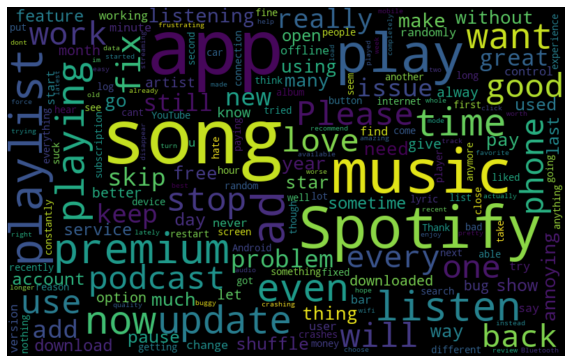

In [16]:
palavras_neutras = ' '.join([texto for texto in reviews_neutras["Review"]])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(palavras_neutras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Nuvem de palavras com reviews negativas

In [17]:
reviews_negativas = reviews.query("sentimento_texto == 'negativa'")

In [18]:
reviews_negativas.head()

,index,Review,Rating,sentimento_pontuacao,sentimento_texto
0,13,Worst app always says I'm offline and never sh...,1,-1.00,negativa
0,17,I can't listen to my DOWNLOADED playlist while...,3,-0.75,negativa
0,33,Am unable to use on my ph .....it gets downloa...,1,-0.50,negativa
0,54,Keeps cutting out and not showing what song is...,1,-0.60,negativa
0,113,Very annoying and disturbing,1,-0.75,negativa


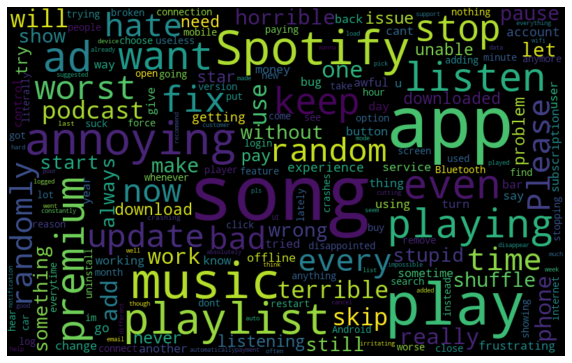

In [19]:
palavras_negativas = ' '.join([texto for texto in reviews_negativas["Review"]])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(palavras_negativas)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

### Resumo das avaliações

Agora vamos fazer uma sumarização das reviews, vamos agregar `n` amostras de cada tipo de avaliação e formar um texto único com elas, em outras palavras, vamos concatenar o texto (coluna `Review` do nosso DataFrame) das negativas, neutras e positivas e formar três textos e então aplicar uma técnica de sumarização para podermos ter um resumo do que acham positivo e negativo.

In [24]:
# pegando amostras aleatórias de cada sentimento

amostras_positivas = reviews_positivas.sample(50)
amostras_neutras = reviews_neutras.sample(50)
amostras_negativas = reviews_negativas.sample(50)

Uma observação que vale ressaltar, por usar o método `.sample(n)` para extrair `n` amostras aleatórias é esperado que o resultado da sumarização no final mude de uma execução do código para outra, estamos fazendo isso pois, como já falado anteriormente, a quantidade de review negativa é muito menor que as outras duas categorias além de que o texto a ser sumarizado poderia se tornar muito grande para as demais categorias. Então fixamos `n = 50` de forma arbitrária.

Voltando ao código, vamos dar continuidade à nossa sumarização, vamos concatenar os textos e gerar o resumo

In [25]:
texto_amostra_positivas = " ".join([review for review in amostras_positivas["Review"]])
texto_amostra_neutras = " ".join([review for review in amostras_neutras["Review"]])
texto_amostra_negativas = " ".join([review for review in amostras_negativas["Review"]])

App has started randomly crashing lately. Horrible... I can't find the buttons... The songs won't show up... Even if I updated it... What happened??!! The playlist doesn't play. Random songs play. Regretting getting the subscription Lots of song options, but ads are annoying, definitely recommend This app is awful. The play button is sometimes there sometimes not. If you download an episode of a podcast it does not matter because you can't use this worthless app if you don't have data. Just awful. I can not for the life of mine share lyrics. I dont know whats wrong. I have a samsung galaxy A50s and a premium account. Broken since the newest update! I can no longer use the app with my headphones. I can't see what song are playing, in the car or on the phone. I can't stop the music. I had to force stop it to stop the music! It is such an annoying app. You get 2 mins ads after literally every song. Its an overhyped app. Unable to login . Says connect to internet every time. Let me play th

Com os textos concatenados vamos ao processo de resumi-los

In [29]:
# O trecho abaixo foi feito com base no repositório da turma
# mais especificamente neste link: https://github.com/adalves-ufabc/2022.Q2-PLN/blob/main/Aula%2020/2022_Q2_PLN_Notebook_27.ipynb

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

# importando biblioteca para seleção de sentencas
import heapq


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# tokenizing the text 
stopWords = set(stopwords.words("english")) 


#A função abaixo é grande parte feita com base no notebook linkado acima, 
# vamos chamar ela para cada um dos três textos acima e vamos obter o resumo deles
def criar_resumo(text):
  words = word_tokenize(text)

  # creating a frequency table to keep the score of each word 
  freqTable = dict() 
  for word in words: 
      word = word.lower() 
      if word in stopWords: 
          continue
      if word in freqTable: 
          freqTable[word] += 1
      else: 
          freqTable[word] = 1

  # creating a dictionary to keep the score of each sentence 
  sentences = sent_tokenize(text) 
  sentenceValue = dict()

  for sentence in sentences: 
      for word, freq in freqTable.items(): 
          if word in sentence.lower(): 
              if sentence in sentenceValue: 
                  sentenceValue[sentence] += freq 
              else: 
                  sentenceValue[sentence] = freq 



  sumValues = 0
  for sentence in sentenceValue: 
    sumValues += sentenceValue[sentence] 

  # average value of a sentence from the original text  
  average = int(sumValues / len(sentenceValue))



  # selecionando as três sentenças com maior peso
  melhores_sents = heapq.nlargest(3, sentenceValue, key=sentenceValue.get)

  # juntando as sentenças
  melhores_sentencas = ' '.join(melhores_sents)

  return melhores_sentencas


resumo_texto_positivo = criar_resumo(texto_amostra_positivas)
resumo_texto_neutro = criar_resumo(texto_amostra_neutras)
resumo_texto_negativo = criar_resumo(texto_amostra_negativas)

In [31]:
from IPython.core.display import display, HTML

display(HTML(f'<h1>Resumo Positivo</h1>'))
display(HTML(f"""{resumo_texto_positivo}"""))
display(HTML(f'<h1>Resumo Neutro</h1>'))
display(HTML(f"""{resumo_texto_neutro}"""))
display(HTML(f'<h1>Resumo Negativo</h1>'))
display(HTML(f"""{resumo_texto_negativo}"""))

## Resultados

Conforme vimos acima, pelo resumo das avaliações podemos ver que características muito elogiada pelas reviews positivas é a facilidade que o aplicativo trás, as pessoas elogiam o fato de não precisar mais que baixar músicas e a variedade de músicas e gêneros disponíveis. Em relação as reviews negativas elas se resumem em bugs que os usuários enfrentam no mesmo como não conseguir logar ou não conseguir baixar uma música, outra reclamação é sobre o excesso de propaganda entre as músicas.

## Conclusão

(Citar aqui sobre os métodos de processamento de linguagem natural que usamos, se foram eficientes se algo pode ser feito melhor em uma próxima pesquisa, se os resultados foram satisfatório, se achamos que atingimos o objetivo proposto, etc)